In [ ]:
#%pdb

## First we read the image using matplotlib library

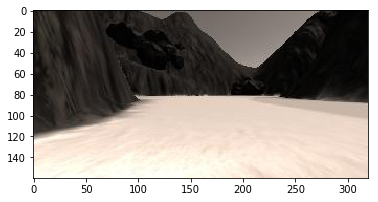

In [94]:
# Import some packages from matplotlib
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Define the filename, read and plot the image
filename = 'img2017-03-26-20-25-10-378.jpg'
image = mpimg.imread(filename)
plt.imshow(image)
plt.show()

## Then we play around with the image

In [147]:
image[:,:,0]

array([[ 45,  35,  27, ...,   4,   4,   4],
       [ 41,  36,  28, ...,   4,   4,   4],
       [ 35,  36,  31, ...,   4,   4,   4],
       ..., 
       [253, 253, 253, ..., 245, 244, 243],
       [252, 252, 252, ..., 244, 243, 243],
       [252, 252, 252, ..., 242, 242, 242]], dtype=uint8)

### Here we obtain the shape and size of the image in pixels

In [39]:
image.shape

(160, 320, 3)

In [40]:
image.size

153600

In [71]:
print(image.dtype, image.shape, np.min(image), np.max(image))

uint8 (160, 320, 3) 0 255


## Now we cut a shape by filtering all the values in the array inside the shape of a circle with center in position (columns/2, 40), and applying a RGB colour combination for these values.

In [95]:
#First we create a copy of the original image for testing this case
new_image = image.copy()
nrows, ncols, ndepth = new_image.shape
row, col = np.ogrid[:nrows, :ncols]
cnt_row, cnt_col = nrows / 2, ncols / 2
outer_disk_mask = ((row-40)**2 + (col-cnt_col)**2 < (80)**2)
new_image[outer_disk_mask] = [127,255,0]

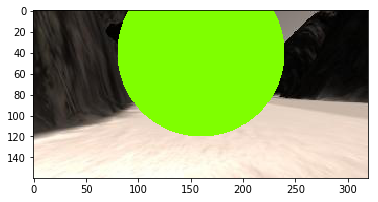

In [96]:
plt.imshow(new_image)
plt.show()

## Now we filter the image's colours

In [141]:
# Note: we use the np.copy() function rather than just saying red_channel = image
# because in Python, such a statement would set those two arrays equal to each other
# forever, meaning any changes made to one would also be made to the other!
red_channel = np.copy(image)
# Note: here instead of extracting individual channels from the image
# I'll keep all 3 color channels in each case but set the ones I'm not interested 
# in to zero.  
red_channel[:,:,[1, 2]] = 0 # Zero out the green and blue channels
green_channel = np.copy(image)
green_channel[:,:,[0, 2]] = 0 # Zero out the red and blue channels
blue_channel = np.copy(image)
blue_channel[:,:,[0, 1]] = 0 # Zero out the red and green channels

#Extra personal channels:
yellow_channel = np.copy(image)
yellow_channel[:,:,[2]] = 0

new_channel = np.copy(image)
new_channel[:,:,[0]] = 0

### Once we have filtered all of the colours from the image we print them

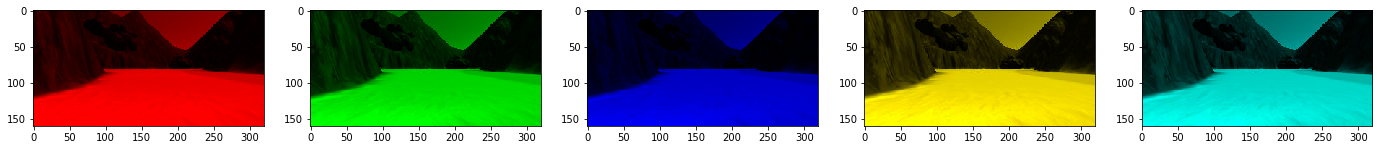

In [143]:
fig = plt.figure(figsize=(24,4)) # Create a figure for plotting
plt.subplot(151) # Initialize subplot number 1 in a figure that is 5 columns 1 row
plt.imshow(red_channel) # Plot the red channel
plt.subplot(152) # Initialize subplot number 2 in a figure that is 5 columns 1 row
plt.imshow(green_channel)  # Plot the green channel
plt.subplot(153) # Initialize subplot number 3 in a figure that is 5 columns 1 row
plt.imshow(blue_channel)  # Plot the blue channel
plt.subplot(154) # Initialize subplot number 4 in a figure that is 5 columns 1 row
plt.imshow(yellow_channel)  # Plot the yellow channel
plt.subplot(155) # Initialize subplot number 5 in a figure that is 5 columns 1 row
plt.imshow(new_channel)  # Plot the new channel
plt.show()

## Now we have an exercise to filter an image into black and white exposing only the brightest areas in the image


In [204]:
#Case 1

# Define a function to perform a color threshold
def color_thresh(img, rgb_thresh=(0, 0, 0)):
    ####### TODO 
    # Create an empty array the same size in x and y as the image 
        # but just a single channel
    nrows, ncols, ndepth = img.shape
    filtered_image = np.zeros_like(img[:,:,0])

    # Apply the thresholds for RGB and 
        # assign 1's where threshold was exceeded        
    filtering_conditions = (img[:,:,0] > rgb_thresh[0]) & (img[:,:,1] > rgb_thresh[1]) & (img[:,:,2] > rgb_thresh[2])
    
    filtered_image[filtering_conditions]=1
        
    return filtered_image

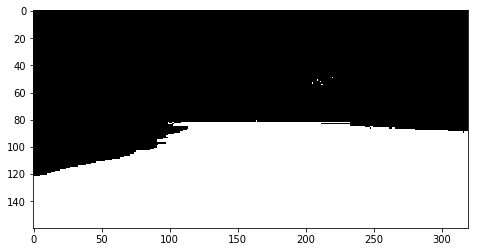

In [239]:
red_t = 170
green_t = 170
blue_t = 0

rgb_filter = (red_t, green_t, blue_t)

filtered_image = color_thresh(image, rgb_filter)

plt.figure(figsize=(24,4))
plt.imshow(filtered_image, cmap="gray")
plt.show()

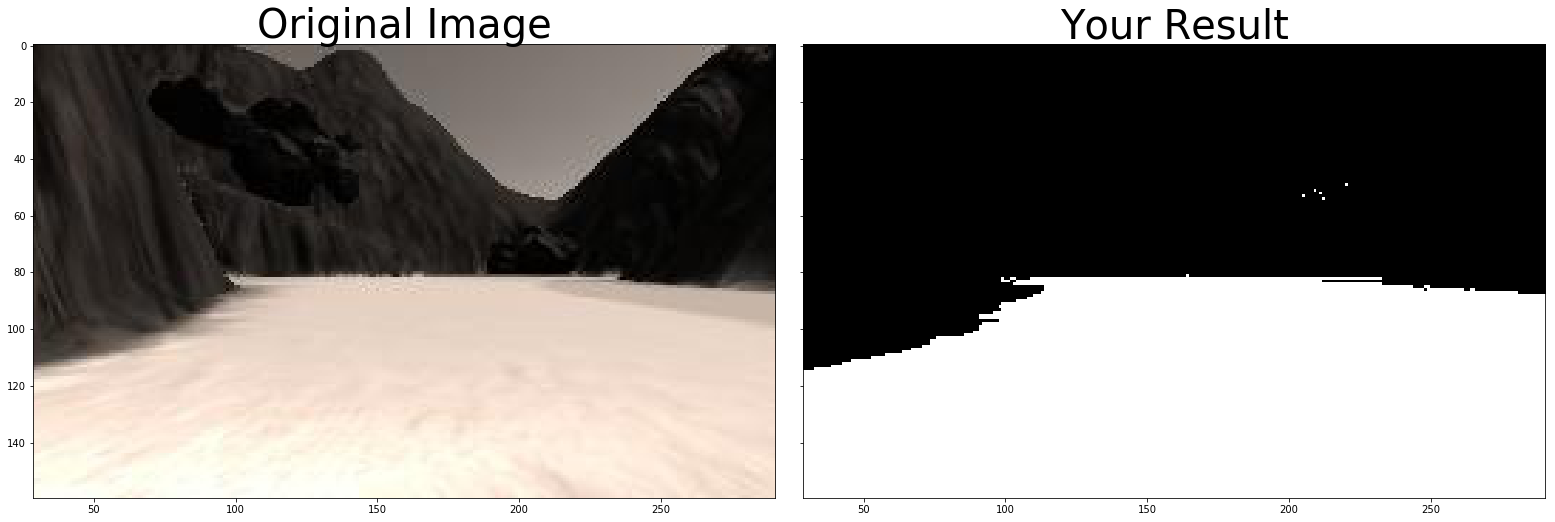

In [241]:
#Udacity's code:
# Define color selection criteria
###### TODO: MODIFY THESE VARIABLES TO MAKE YOUR COLOR SELECTION
red_threshold = 170
green_threshold = 170
blue_threshold = 0
######
rgb_threshold = (red_threshold, green_threshold, blue_threshold)

# pixels below the thresholds
colorsel = color_thresh(image, rgb_thresh=rgb_threshold)

# Display the original image and binary               
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(21, 7), sharey=True)
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=40)

ax2.imshow(colorsel, cmap='gray')
ax2.set_title('Your Result', fontsize=40)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
plt.show() # Uncomment if running on your local machine